# How to use spocon

In [1]:
import sys
sys.path.append("../spocon")
import spocon

## To derive spot contrast from $T_{\rm spot}$, $T_{\rm phot}$

From e.g., Notsu et al. (2013),  Morris et al. (2018), Mori et al. (2024)

spot contrast $c_B$ for each band $B$ is described as...

$c_B = (\int_B F_{\lambda \cdot spot}T_\lambda d\lambda)\,/\,(\int_B F_{\lambda \cdot phot}T_\lambda d\lambda)$

In [2]:
### 
T_spot = 3080
T_phot = 3500
band = 'g'
###


# based on BT-Settl models
#The code is applicable to spot/photosphere temperatures from 1700K to 5000K.
spocon.contrast(T_spot, T_phot, band) 

array([0.23875532])

Tspot and Tphot can also be entered in array.

In [3]:
spocon.contrast([3050, 3100, 3150], [3350, 3390], 'g')

array([[0.32614157, 0.40448669, 0.49432185],
       [0.28802188, 0.35720996, 0.43654511]])

### Filters

In [4]:
bands = ['g', 'r', 'i', 'z',  #Sinistro
         'zg', 'zr',  #ZTF
         'k', 't', #Kepler, TESS
         'Mg', 'Mr', 'Mi', 'Mz'] #MuSCAT

## To estimate Tspot from Tphot

The code is useful when you want to estimate the spot temperature, but you only know the effective temperature ($T_{\rm eff} \sim T_{\rm phot}$) of the star.

Based on Herbst et al. (2021)

- model 'Herbst1' : Eq.(4) in Herbst+21, derived from the sample in Berdyugina05
- model 'Herbst2' : Eq.(5) (typo in the paper) in Herbst+21, derived from the sample in Berdyugina05, Biazzo+06, Valio17

In [5]:
###
T_phot = 3200
###

T_spot_low, T_spot_mid, T_spot_high = spocon.estimate_Tspot_emp(T_phot, model='Herbst1')

print(f'T_spot_low = {T_spot_low}K, T_spot = {T_spot_mid}K, T_spot_high = {T_spot_high}K')
print(f'T_spot = {T_spot_mid} +/- {T_spot_high-T_spot_mid} K')

T_spot_low = 2375K, T_spot = 2863K, T_spot_high = 3351K
T_spot = 2863 +/- 488 K


## Figures

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

### Plot spot contrast per different $T_{\rm spot}$

Text(0, 0.5, 'Spot Contrast')

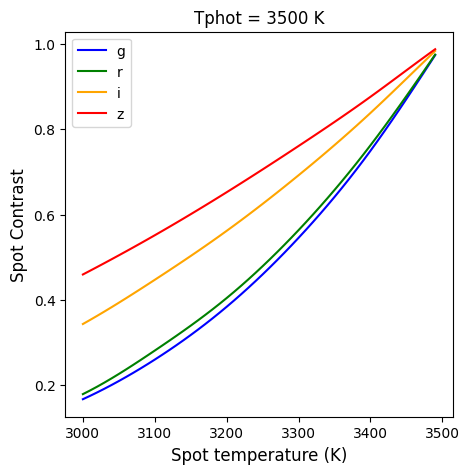

In [7]:
bands = ['g', 'r', 'i', 'z']
colors = ['blue', 'green', 'orange', 'red']

T_phot = 3500
T_spot_array = np.arange(3000, 3500, 10)

f, axs = pl.subplots(1, 1, figsize=(5, 5))

for b, c in zip(bands, colors):
    con_array = spocon.contrast(T_spot_array, T_phot, b)
    axs.plot(T_spot_array, con_array, label=b, color=c)
axs.legend()

axs.set_title(f'Tphot = {T_phot} K')
axs.set_xlabel('Spot temperature (K)', fontsize=12)
axs.set_ylabel('Spot Contrast', fontsize=12)


### Make figures in Herbst et al. (2021)

Text(0, 0.5, '$T_{\\rm spot}$')

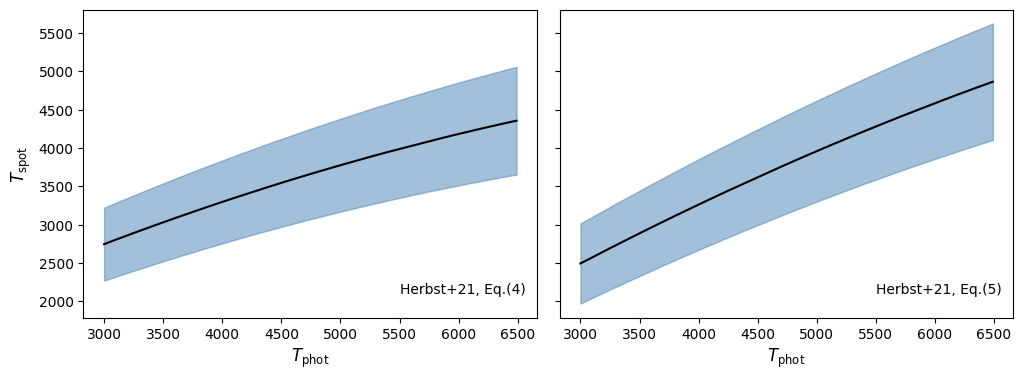

In [8]:
f, axs = pl.subplots(1, 2, figsize=(12, 4), sharey=True)
pl.subplots_adjust(wspace=0.05)

for i in range(2):
    Tp = np.arange(3000, 6500, 10)
    Tss = spocon.estimate_Tspot_emp(Tp, model=['Herbst1','Herbst2'][i])
    Ts_low, Ts, Ts_up = Tss[0],Tss[1],Tss[2]

    axs[i].fill_between(Tp, Ts_low, Ts_up, color='steelblue', alpha=0.5)
    axs[i].plot(Tp, Ts, color='k')
    axs[i].set_xlabel(r'$T_{\rm phot}$', fontsize=12)
    axs[i].text(5500, 2100, f'Herbst+21, Eq.({[4,5][i]})', fontsize=10)

axs[0].set_ylabel(r'$T_{\rm spot}$', fontsize=12)

[2024 Sep 13]  To be updated...
- derive modulation amplitude from Tphot, Tspot, fspot, filter
- estimate fspot from Tphot, filter, amplitude
- estimate fspot from Tphot, TESS light curve
- spocon.filter to show filters
- add more explanation when you run spocon.contrast?
- add more filters
- add more stellar models
- update empirical relation to estimate Tspot (Mori et al. in prep)